Importing General Dependencies

In [1]:
import numpy as np
from scipy.integrate import quad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

Importing ML Dependencies

In [67]:
# sklearn will be used for clustering and splitting the data
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state

# umap will be used for dimensionality reduction
!pip install umap-learn
import umap.umap_ as umap

# hbdscan, adjust_rand_score and adjust_mutual_info_score are used to evaluate 
# the accuracy of the prediction. 
!pip install hdbscan
import hdbscan
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

     |████████████████████████████████| 6.4 MB 6.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311910 sha256=27cf2ce80ad94404d207b12bb7411d1295ce830bb170aa64b22bf37d32d19905
  Stored in directory: /root/.cache/pip/wheels/73/5f/2f/9a259b84003b84847c259779206acecabb25ab56f1506ee72b
Successfully built hdbscan


Importing Data

In [11]:
# Importing the mnist_784 data set from sklearn

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

# The X data set represents the 28*28 grid of the drawn photos.
# There are 70,000 photos and each photo has 784 features.
# That is why the X table has the shape (70000, 784). 
# Each value inside each column is a number between 0 - 1,
# That represents how dark the pixel is at point. 
X = mnist.data


# The Y data set are the corresponding labels to the X data. 
# That is why the shape is (70000,). 

Y = mnist.target

# Here I am converting the values inside the labels into floats
# because this will be useful for future computations. 

for i in range(len(Y)):
  Y[i] = float(Y[i])

In [12]:
Y

array([5.0, 0.0, 4.0, ..., 4.0, 5.0, 6.0], dtype=object)

In [8]:
X.shape, Y.shape

((70000, 784), (70000,))

Visualising the Data

5.0


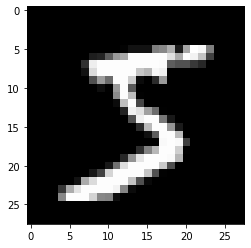

In [31]:

# We must unflatten the data back into a matrix in order 
# to plot it:
img1 = X[0].reshape((28,28))
plt.imshow(img1, cmap=plt.cm.gray)
print(Y[0])



Splitting the Data

In [35]:
# In this cell I am shuffling the rows in the data to prepare a sample
# to be used for the training and test sets. 

# shuffle data
sk.utils.shuffle(X)

# pick training and test data sets 
# I chose to put 80% of the data into the training set, and 20% into the test set.
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = .2)

# Select only 1/3 of data
# X_train =  X_train[:int(len(X_train) / 3)]
# X_test = X_test[:int(len(X_test) / 3)]
# Y_train = Y_train[:int(len(Y_train) / 3)]
# Y_test = Y_test[:int(len(Y_test) / 3)]

print(np.shape(X_train), np.shape(Y_train))
print(np.shape(X_test), np.shape(Y_test))

(56000, 784) (56000,)
(14000, 784) (14000,)


Clustering and Dimensionality Reduction using UMAP
https://pair-code.github.io/understanding-umap/

UMAP is essentially an new alternative to t-SNE that has advantages including runtime improvement. 

In [97]:
# First, define the UMAP model:
model = umap.UMAP(n_neighbors=200, min_dist=0.0)

In [98]:
# Here using UMAP, we reduce the dimensionality of the data from having
# 784 columns, to now only 2. This sets us up to use clustering for classifcation. 
embedding_train = model.fit_transform(X_train, Y_train)

In [99]:
# Here we now reduce the dimensionality for the test set as well.
# When running this an error might occur which says 
# "can't pickle weakref objects"
# Run the cell again
embedding_test = model.transform(X_test)

In [100]:
embedding_train.shape, embedding_test.shape

((56000, 2), (14000, 2))

Visualising the Predictions 

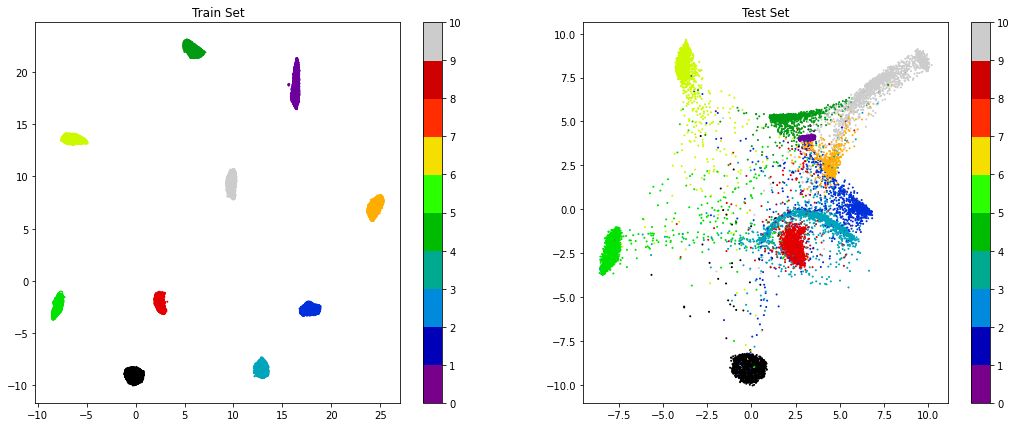

In [111]:
bounds = np.linspace(0, 10, 11)

plt.figure(figsize = (18, 7))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.scatter(embedding_train[:, 0], embedding_train[:, 1], c=Y_train, cmap="nipy_spectral", s=1)
plt.colorbar(ticks=bounds, boundaries=bounds, format='%1i')
plt.title("Train Set")


# plt.figure(figsize = (10, 7))
plt.subplot(1, 2, 2) # row 1, col 2 index 1
plt.scatter(embedding_test[:, 0], embedding_test[:, 1],c=Y_test, cmap="nipy_spectral", s=1)
plt.colorbar(ticks=bounds, boundaries=bounds, format='%1i')
plt.title("Test Set")
plt.show()

In [ ]:
# there are no -1 values, but they are shown in the color plot; however,
# to read the color plot, 0 corresponds to black, 1 purple, 2 blue... etc

Evaluating Prediction Accuracy using UMAP Supervised Learning

In [102]:
# Here we are using hbdscan to evaluate our predictions
HDBSCAN_model = hdbscan.HDBSCAN(min_samples=10,min_cluster_size=500)
HDBSCAN_labels = HDBSCAN_model.fit_predict(embedding_test)
HDBSCAN_labels[0:20]

array([ 9, -1,  4,  1,  7,  6,  0, -1,  0,  2,  0,  5,  5,  2,  7,  1, -1,
        8,  9,  7])

In [133]:
labels_true = Y_test
labels_pred = HDBSCAN_labels

In [134]:
print("adjusted Rand score: ", adjusted_rand_score(labels_true, labels_pred))
print("adjusted mutual information: ", adjusted_mutual_info_score(labels_true,labels_pred))

adjusted Rand score:  0.771467414084979
adjusted mutual information:  0.8049137843359243


The model performs with 77% accuracy when predicting the numbers in the test set.

In [183]:
# Re shuffle the data
sk.utils.shuffle(X)

# pick training and test data sets 
# I chose to put 80% of the data into the training set, and 20% into the test set.
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = .2)

In [205]:
model = umap.UMAP(n_neighbors=30,min_dist=0.0,random_state=42)

embedding_train_unsupervised = model.fit_transform(X_train)

embedding_test_unsupervised = model.transform(X_test)

In [206]:
embedding_train_unsupervised.shape, embedding_test_unsupervised.shape

((56000, 2), (14000, 2))

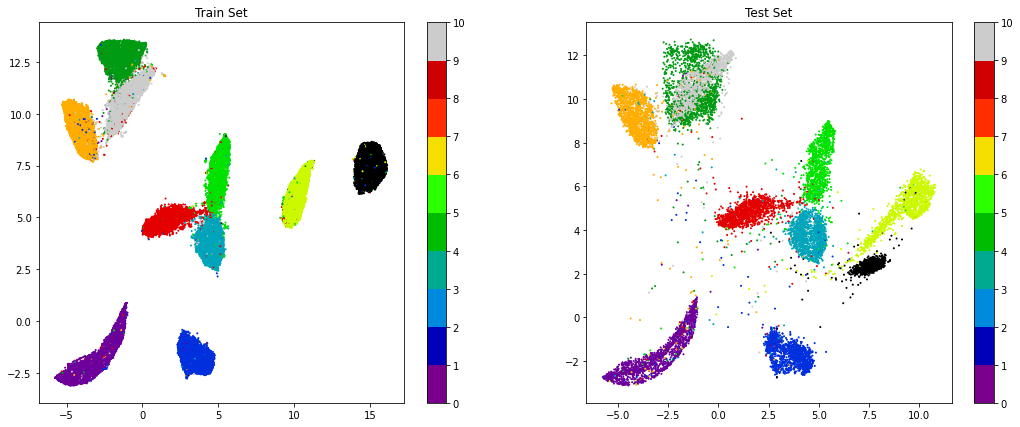

In [207]:
bounds = np.linspace(0, 10, 11)

plt.figure(figsize = (18, 7))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.scatter(embedding_train_unsupervised[:, 0], embedding_train_unsupervised[:, 1], c=Y_train, cmap="nipy_spectral", s=1)
plt.colorbar(ticks=bounds, boundaries=bounds, format='%1i')
plt.title("Train Set")


# plt.figure(figsize = (10, 7))
plt.subplot(1, 2, 2) # row 1, col 2 index 1
plt.scatter(embedding_test_unsupervised[:, 0], embedding_test_unsupervised[:, 1],c=Y_test, cmap="nipy_spectral", s=1)
plt.colorbar(ticks=bounds, boundaries=bounds, format='%1i')
plt.title("Test Set")
plt.show()

What I find interesting about the scatter plots above is that the algorithm has the most trouble descerning between 9 and 4, which would make sense because they look the most similar.

In [208]:
HDBSCAN_model_unsupervised = hdbscan.HDBSCAN(min_samples=10,min_cluster_size=100)

In [209]:
HDBSCAN_labels_unsupervised = HDBSCAN_model.fit_predict(embedding_train_unsupervised)

In [210]:
labels_true = Y_train
labels_pred = HDBSCAN_labels_unsupervised

In [211]:
print("adjusted Rand score: ", adjusted_rand_score(labels_true, labels_pred))
print("adjusted mutual information: ", adjusted_mutual_info_score(labels_true,labels_pred))

adjusted Rand score:  0.9161487022807582
adjusted mutual information:  0.8997154229970733


Using unsupervised learning with UMAP clustering the model performs with 91% accuracy. 

Next step is to implement a nueral network to see if I can improve this score even higher. 